### library import

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### data load

In [61]:
data = pd.read_csv("/Users/ichanhyi/PythonWorkSpace_anaconda/datasets/Mall_Customers.csv")

### EDA(Exploratory data analysis)

In [62]:
data.shape

(200, 5)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [64]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [65]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

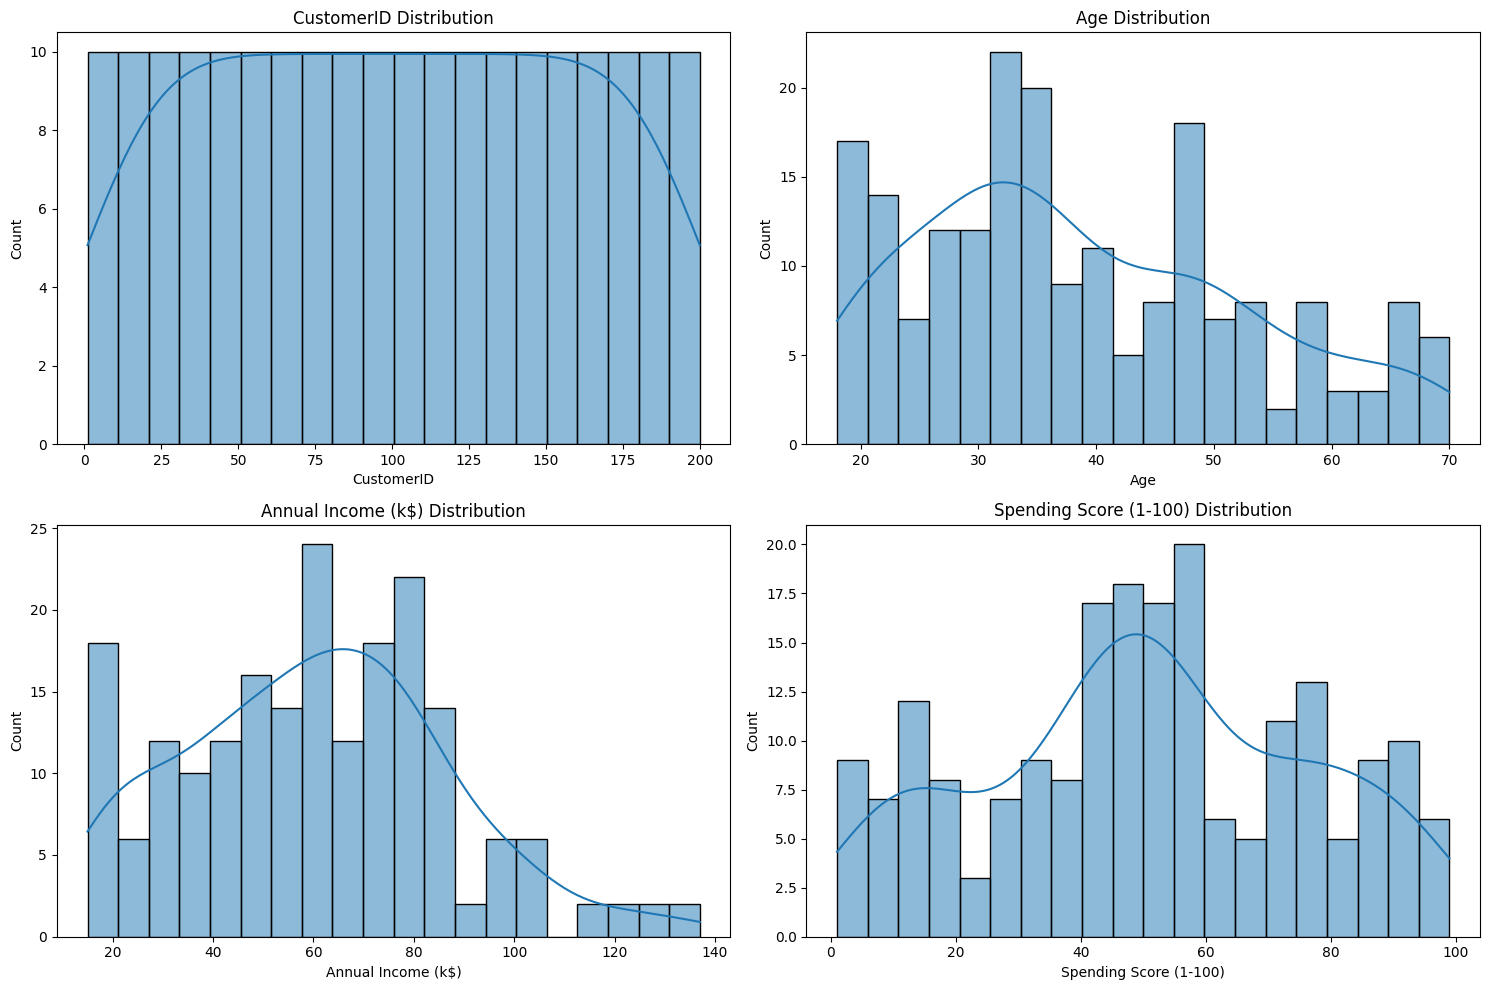

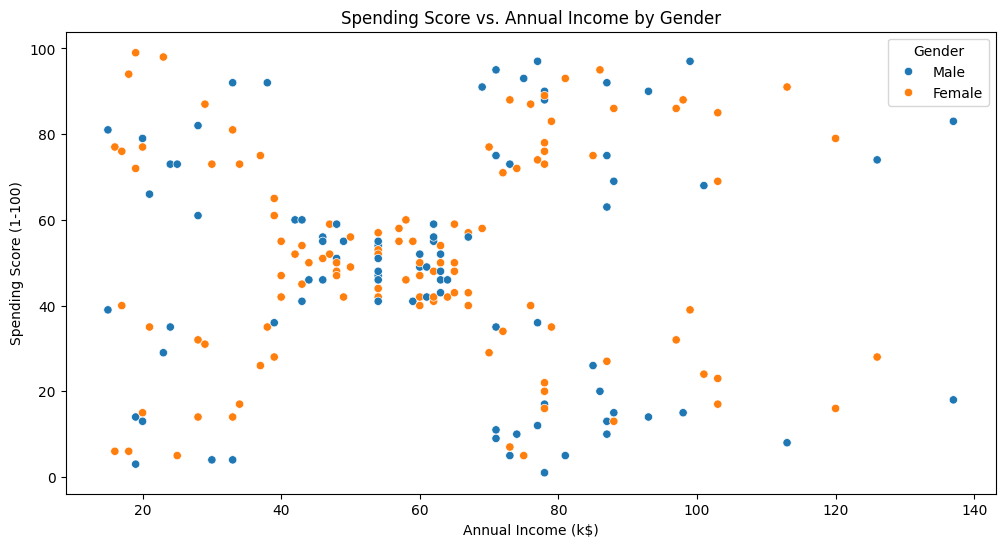

In [66]:
# Gender 열을 제외한 숫자형 데이터로만 이루어진 데이터프레임 생성
data_numeric = data.drop('Gender', axis=1)

# 더욱 차원이 복잡해지는 것을 방지하기 위해, gender 열 제외합니다.

# 각 열에 대한 히스토그램 그리기
plt.figure(figsize=(15, 10))
for i, col in enumerate(data_numeric.columns, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(col + " Distribution")
plt.tight_layout()
plt.show()

# Gender 별 소비 점수와 연간 소득 비교
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Spending Score vs. Annual Income by Gender')
plt.show()

# gender는 분산되어 있어서 제외하고 사용합니다.

In [67]:
len(data['CustomerID'].unique())

200

In [68]:
data.drop('CustomerID', axis=1, inplace=True) 
data.drop('Gender', axis=1, inplace=True) 

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


### data scaling

In [70]:
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 사용하여 데이터 전처리
scaler = MinMaxScaler()
X = scaler.fit_transform(data)

X

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

### Elbow Method to find K

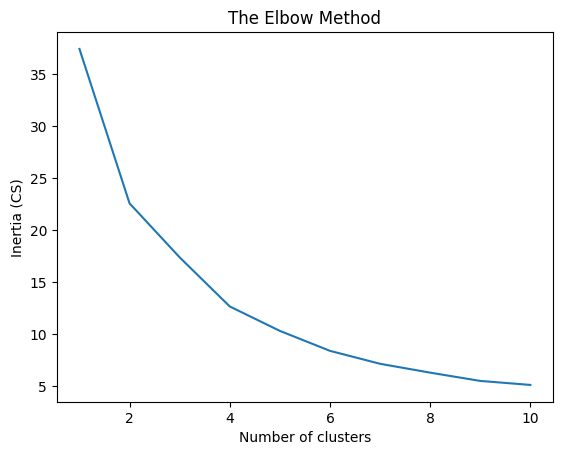

In [72]:
from sklearn.cluster import KMeans

# 빈 리스트 생성 (클러스터 개수에 따른 불변량 저장)
cs = []

# KMeans 객체 생성을 위한 반복문
for i in range(1, 11):
  # KMeans 객체 생성
  # n_init : 초기 중심값 설정을 몇 번 반복할지 설정
  # init : 초기 중심값 설정 방법(K-means++ / random)
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  
  # KMeans 모델 학습
  kmeans.fit(X)
  
  # 불변량 값 추출하여 리스트에 저장
  cs.append(kmeans.inertia_)

# Elbow method 그래프 생성
plt.plot(range(1, 11), cs)  # x축: 클러스터 개수, y축: 불변량
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (CS)')
plt.show()

### Silhoutte Analysis to find K

In [73]:
from sklearn.metrics import silhouette_score

n_clusters_range = range(2, 11)
silhouette_scores = []
#X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

for n_clusters in n_clusters_range:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the best number of clusters based on the highest silhouette score
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)

print(f"Best number of clusters: {best_n_clusters}")
print(f"Corresponding silhouette score: {best_silhouette_score}")

/Users/ichanhyi/PythonWorkSpace_anaconda/K-means_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ichanhyi/PythonWorkSpace_anaconda/K-means_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ichanhyi/PythonWorkSpace_anaconda/K-means_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ichanhyi/PythonWorkSpace_anaconda/K-means_study/

Best number of clusters: 9
Corresponding silhouette score: 0.4272016672486137


/Users/ichanhyi/PythonWorkSpace_anaconda/K-means_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ichanhyi/PythonWorkSpace_anaconda/K-means_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Best K is 5 or 9

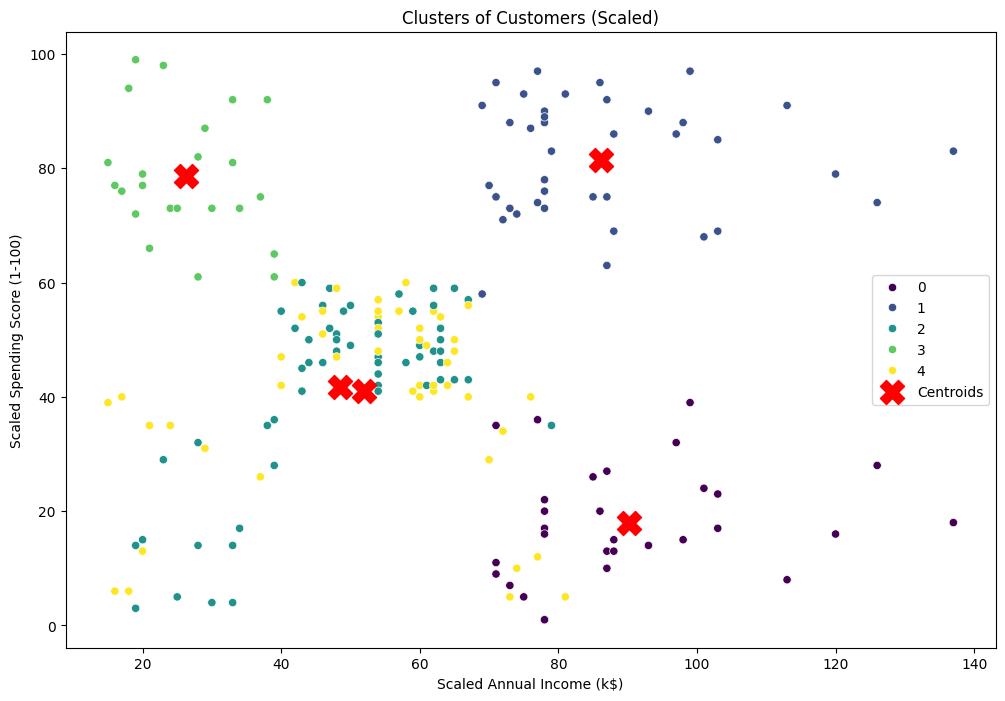

In [79]:
# 클러스터 개수 선택 (예: k=4)
k = 5

# k-means 모델 생성 및 훈련
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)

# 각 데이터 포인트에 대한 클러스터 할당
cluster_centers_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_labels = kmeans.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data.iloc[:, 1], y=data.iloc[:, 2], hue=cluster_labels, palette='viridis')
plt.scatter(cluster_centers_original_scale[:, 1], cluster_centers_original_scale[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Scaled Annual Income (k$)')
plt.ylabel('Scaled Spending Score (1-100)')
plt.title('Clusters of Customers (Scaled)')
plt.legend()
plt.show()

In [ ]:
X[:, 1]

array([0.        , 0.        , 0.00819672, 0.00819672, 0.01639344,
       0.01639344, 0.02459016, 0.02459016, 0.03278689, 0.03278689,
       0.03278689, 0.03278689, 0.04098361, 0.04098361, 0.04098361,
       0.04098361, 0.04918033, 0.04918033, 0.06557377, 0.06557377,
       0.07377049, 0.07377049, 0.08196721, 0.08196721, 0.10655738,
       0.10655738, 0.10655738, 0.10655738, 0.1147541 , 0.1147541 ,
       0.12295082, 0.12295082, 0.14754098, 0.14754098, 0.14754098,
       0.14754098, 0.1557377 , 0.1557377 , 0.18032787, 0.18032787,
       0.18852459, 0.18852459, 0.19672131, 0.19672131, 0.19672131,
       0.19672131, 0.20491803, 0.20491803, 0.20491803, 0.20491803,
       0.22131148, 0.22131148, 0.2295082 , 0.2295082 , 0.2295082 ,
       0.2295082 , 0.23770492, 0.23770492, 0.25409836, 0.25409836,
       0.25409836, 0.25409836, 0.26229508, 0.26229508, 0.2704918 ,
       0.2704918 , 0.2704918 , 0.2704918 , 0.2704918 , 0.2704918 ,
       0.27868852, 0.27868852, 0.28688525, 0.28688525, 0.31967